## **1-11. 프로젝트 (1) load_digits : 손글씨를 분류해 봅시다**

### **(1) 필요한 모듈 import하기**

In [1]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, recall_score, f1_score
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

### **(2) 데이터 준비**

In [2]:
# 데이터 불러오기
digits = load_digits()

### **(3) 데이터 이해하기**

In [3]:
# 데이터셋에 담긴 정보 종류 확인하기
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [4]:
# Feature Data 지정하기
digits_data = digits.data
# 배열의 형상정보 출력하기
print(digits_data.shape)

(1797, 64)


In [5]:
# Label Data 지정하기
digits_label = digits.target
# 배열의 형상정보 출력하기
print(digits_label.shape)

(1797,)


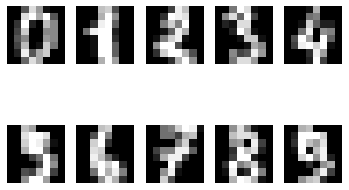

In [6]:
# 이미지 확인하기
for i in range(10):
    plt.subplot(2, 5, i+1) # 10개의 이미지를 2행 5열로 표시
    plt.imshow(digits.data[i].reshape(8, 8), cmap='gray') 
    # plt.imshow()는 (m,n) 형태의 데이터를 입력으로 받기 때문에
    # 데이터셋 내의 1열로 펼쳐진 64개의 데이터를 원래의 이미지 형태인 (8,8)로 복원
    # cmap은 해당 이미지의 색상을 지정(gray는 흑백으로 출력)
    plt.axis('off') # 축을 보이지 않게 해줍니다. 
plt.show()

In [7]:
# Target Names 출력하기
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [8]:
# 데이터 Describe하기
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

### **(4) train, test 데이터 분리**

In [9]:
# 데이터프레임으로 변환하기
digits_df = pd.DataFrame(data=digits_data, columns=digits.feature_names)
digits_df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [10]:
# label 컬럼 추가하기
digits_df["label"] = digits.target
digits_df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,label
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [11]:
# 데이터 분리하기
X_train, X_test, y_train, y_test = train_test_split(digits_data, 
                                                    digits_label, 
                                                    test_size=0.2, 
                                                    random_state=7)

print('X_train 개수: ', len(X_train),', X_test 개수: ', len(X_test))

X_train 개수:  1437 , X_test 개수:  360


In [12]:
# train의 형상정보 확인하기
X_train.shape, y_train.shape

((1437, 64), (1437,))

In [13]:
# test의 형상정보 확인하기
X_test.shape, y_test.shape

((360, 64), (360,))

In [14]:
# 분리가 잘 되었는지 확인하기
y_train, y_test

(array([2, 2, 2, ..., 1, 3, 3]),
 array([6, 0, 5, 9, 2, 9, 0, 4, 1, 0, 1, 8, 2, 5, 2, 8, 1, 8, 9, 1, 0, 2,
        0, 4, 5, 3, 3, 0, 0, 4, 1, 4, 4, 4, 6, 1, 4, 0, 6, 6, 0, 9, 3, 6,
        6, 2, 0, 1, 9, 6, 2, 8, 9, 9, 0, 2, 0, 8, 4, 6, 8, 5, 8, 7, 8, 7,
        7, 4, 1, 4, 5, 5, 4, 6, 2, 0, 1, 3, 7, 5, 8, 2, 4, 4, 2, 5, 1, 9,
        3, 7, 6, 3, 3, 5, 6, 2, 1, 0, 1, 9, 4, 1, 1, 3, 1, 6, 9, 0, 3, 7,
        6, 9, 3, 8, 0, 8, 3, 8, 8, 6, 3, 7, 3, 9, 0, 3, 0, 9, 8, 1, 2, 2,
        3, 6, 9, 4, 0, 5, 4, 2, 9, 1, 0, 2, 5, 0, 2, 2, 7, 4, 6, 9, 8, 2,
        6, 0, 4, 4, 8, 5, 0, 2, 4, 6, 8, 2, 3, 7, 2, 9, 0, 3, 5, 9, 1, 6,
        8, 7, 5, 3, 0, 4, 2, 1, 3, 3, 6, 0, 2, 8, 4, 1, 4, 7, 5, 7, 6, 6,
        8, 1, 0, 6, 8, 7, 1, 1, 9, 8, 5, 5, 3, 6, 8, 1, 2, 0, 7, 5, 3, 0,
        8, 2, 0, 4, 0, 9, 4, 8, 4, 7, 9, 7, 3, 6, 2, 5, 1, 5, 9, 2, 9, 9,
        8, 2, 1, 6, 7, 1, 7, 5, 7, 8, 9, 5, 7, 4, 3, 7, 8, 8, 2, 8, 9, 5,
        3, 2, 8, 0, 4, 2, 1, 0, 8, 4, 1, 7, 1, 4, 7, 7, 1, 8, 3, 8, 4, 3,
     

### **(5) 다양한 모델로 학습시켜보기**

#### **Decision Tree**

In [15]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(random_state=32)
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)

print(classification_report(y_test, y_pred))
dt_accuracy = accuracy_score(y_test, y_pred)
dt_accuracy

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        43
           1       0.81      0.81      0.81        42
           2       0.79      0.82      0.80        40
           3       0.79      0.91      0.85        34
           4       0.83      0.95      0.89        37
           5       0.90      0.96      0.93        28
           6       0.84      0.93      0.88        28
           7       0.96      0.82      0.89        33
           8       0.88      0.65      0.75        43
           9       0.78      0.78      0.78        32

    accuracy                           0.86       360
   macro avg       0.86      0.86      0.86       360
weighted avg       0.86      0.86      0.85       360



0.8555555555555555

#### **Random Forest**

In [16]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(random_state=32)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)

print(classification_report(y_test, y_pred))
rf_accuracy = accuracy_score(y_test, y_pred)
rf_accuracy

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        43
           1       0.93      1.00      0.97        42
           2       1.00      1.00      1.00        40
           3       1.00      1.00      1.00        34
           4       0.93      1.00      0.96        37
           5       0.90      0.96      0.93        28
           6       1.00      0.96      0.98        28
           7       0.94      0.97      0.96        33
           8       1.00      0.84      0.91        43
           9       0.94      0.94      0.94        32

    accuracy                           0.96       360
   macro avg       0.96      0.96      0.96       360
weighted avg       0.97      0.96      0.96       360



0.9638888888888889

#### **Support Vector Machine (SVM)**

In [17]:
from sklearn import svm

svm_model = svm.SVC()
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

print(classification_report(y_test, y_pred))
svm_accuracy = accuracy_score(y_test, y_pred)
svm_accuracy

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       0.95      1.00      0.98        42
           2       1.00      1.00      1.00        40
           3       1.00      1.00      1.00        34
           4       1.00      1.00      1.00        37
           5       0.93      1.00      0.97        28
           6       1.00      1.00      1.00        28
           7       1.00      1.00      1.00        33
           8       1.00      0.93      0.96        43
           9       1.00      0.97      0.98        32

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360



0.9888888888888889

#### **Stochastic Gradient Descent Classifier (SGDClassifier)**

In [18]:
from sklearn.linear_model import SGDClassifier

sgd_model = SGDClassifier()
sgd_model.fit(X_train, y_train)
y_pred = sgd_model.predict(X_test)

print(classification_report(y_test, y_pred))
sgd_accuracy = accuracy_score(y_test, y_pred)
sgd_accuracy

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       0.88      0.90      0.89        42
           2       0.98      1.00      0.99        40
           3       0.89      0.94      0.91        34
           4       1.00      0.97      0.99        37
           5       0.96      0.96      0.96        28
           6       0.96      0.93      0.95        28
           7       0.97      0.97      0.97        33
           8       0.95      0.88      0.92        43
           9       0.94      0.97      0.95        32

    accuracy                           0.95       360
   macro avg       0.95      0.95      0.95       360
weighted avg       0.95      0.95      0.95       360



0.9527777777777777

#### **Logistic Regression**

In [19]:
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
y_pred = logistic_model.predict(X_test)

print(classification_report(y_test, y_pred))
lr_accuracy = accuracy_score(y_test, y_pred)
lr_accuracy

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       0.95      0.95      0.95        42
           2       0.98      1.00      0.99        40
           3       0.94      0.97      0.96        34
           4       0.97      1.00      0.99        37
           5       0.82      0.96      0.89        28
           6       1.00      0.96      0.98        28
           7       0.97      0.97      0.97        33
           8       0.92      0.81      0.86        43
           9       0.97      0.91      0.94        32

    accuracy                           0.95       360
   macro avg       0.95      0.95      0.95       360
weighted avg       0.95      0.95      0.95       360



/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9527777777777777

### **(6) 모델을 평가해 보기**

문제의 목적은 주어진 이미지에서 정확한 숫자를 예측하는 것이므로 예측이 정확히 맞는지 여부가 가장 중요하다고 판단되어 정확도(Accuracy)를 사용해서 평가를 진행해보기로 하였다.

In [20]:
print("Decision Tree:", dt_accuracy)
print("Random Forest:", rf_accuracy)
print("SVM:", svm_accuracy)
print("SGD Classifier:", sgd_accuracy)
print("Logistic Regression:", lr_accuracy)

Decision Tree: 0.8555555555555555
Random Forest: 0.9638888888888889
SVM: 0.9888888888888889
SGD Classifier: 0.9527777777777777
Logistic Regression: 0.9527777777777777


**SVM 모델이 약 98.9%로 굉장히 높은 성능이 나온 것을 확인할 수 있다.**

---

## **1-12. 프로젝트 (2) load_wine : 와인을 분류해 봅시다**

### **(1) 필요한 모듈 import하기**

In [21]:
from sklearn.datasets import load_wine

### **(2) 데이터 준비**

In [22]:
# 데이터 불러오기
wine = load_wine()

### **(3) 데이터 이해하기**

In [23]:
# 데이터셋에 담긴 정보 종류 확인하기
wine.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

In [24]:
# Feature Data 지정하기
wine_data = wine.data
# 배열의 형상정보 출력하기
print(wine_data.shape)

(178, 13)


In [25]:
# Label Data 지정하기
wine_label = wine.target
# 배열의 형상정보 출력하기
print(wine_label.shape)

(178,)


In [26]:
# Target Names 출력하기
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [27]:
# 데이터 Describe하기
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

### **(4) train, test 데이터 분리**

In [28]:
# 데이터프레임으로 변환하기
wine_df = pd.DataFrame(data=wine_data, columns=wine.feature_names)
wine_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [29]:
# label 컬럼 추가하기
wine_df["label"] = wine.target
wine_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,label
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [30]:
# 데이터 분리하기
X_train, X_test, y_train, y_test = train_test_split(wine_data, 
                                                    wine_label, 
                                                    test_size=0.2, 
                                                    random_state=7)

print('X_train 개수: ', len(X_train),', X_test 개수: ', len(X_test))

X_train 개수:  142 , X_test 개수:  36


In [31]:
# train의 형상정보 확인하기
X_train.shape, y_train.shape

((142, 13), (142,))

In [32]:
# test의 형상정보 확인하기
X_test.shape, y_test.shape

((36, 13), (36,))

In [33]:
# 분리가 잘 되었는지 확인하기
y_train, y_test

(array([2, 2, 0, 2, 0, 1, 2, 2, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
        2, 0, 2, 1, 2, 0, 2, 1, 1, 1, 0, 1, 0, 0, 2, 0, 2, 1, 1, 2, 1, 0,
        1, 1, 1, 1, 0, 0, 0, 1, 1, 2, 1, 0, 1, 2, 0, 1, 0, 2, 1, 0, 0, 0,
        0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 2, 2, 0, 0, 0, 2, 0, 0, 1, 2, 1, 1,
        0, 0, 2, 0, 2, 2, 2, 1, 2, 1, 2, 1, 0, 0, 2, 1, 2, 1, 1, 0, 1, 2,
        1, 2, 0, 0, 2, 0, 1, 2, 0, 1, 0, 0, 0, 0, 1, 0, 2, 1, 1, 2, 0, 1,
        1, 1, 0, 2, 1, 1, 2, 1, 0, 2]),
 array([2, 0, 2, 2, 1, 2, 1, 0, 1, 2, 0, 1, 2, 1, 1, 1, 1, 2, 0, 0, 1, 1,
        1, 1, 0, 2, 1, 2, 2, 2, 1, 0, 2, 1, 1, 1]))

### **(5) 다양한 모델로 학습시켜보기**

#### **Decision Tree**

In [34]:
decision_tree = DecisionTreeClassifier(random_state=32)
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)

print(classification_report(y_test, y_pred))
dt_f1 = f1_score(y_test, y_pred, average='weighted')
dt_f1

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.89      1.00      0.94        17
           2       1.00      0.83      0.91        12

    accuracy                           0.94        36
   macro avg       0.96      0.94      0.95        36
weighted avg       0.95      0.94      0.94        36



0.9434624017957352

#### **Random Forest**

In [35]:
random_forest = RandomForestClassifier(random_state=32)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)

print(classification_report(y_test, y_pred))
rf_f1 = f1_score(y_test, y_pred, average='weighted')
rf_f1

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        12

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



1.0

#### **Support Vector Machine (SVM)**

In [36]:
svm_model = svm.SVC()
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

print(classification_report(y_test, y_pred))
svm_f1 = f1_score(y_test, y_pred, average='weighted')
svm_f1

              precision    recall  f1-score   support

           0       0.86      0.86      0.86         7
           1       0.58      0.88      0.70        17
           2       0.33      0.08      0.13        12

    accuracy                           0.61        36
   macro avg       0.59      0.61      0.56        36
weighted avg       0.55      0.61      0.54        36



0.5405684754521964

#### **Stochastic Gradient Descent Classifier (SGDClassifier)**

In [37]:
sgd_model = SGDClassifier()
sgd_model.fit(X_train, y_train)
y_pred = sgd_model.predict(X_test)

print(classification_report(y_test, y_pred))
sgd_f1 = f1_score(y_test, y_pred, average='weighted')
sgd_f1

              precision    recall  f1-score   support

           0       0.86      0.86      0.86         7
           1       0.55      0.94      0.70        17
           2       0.00      0.00      0.00        12

    accuracy                           0.61        36
   macro avg       0.47      0.60      0.52        36
weighted avg       0.43      0.61      0.50        36



/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.49516908212560384

#### **Logistic Regression**

In [38]:
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
y_pred = logistic_model.predict(X_test)

print(classification_report(y_test, y_pred))
lr_f1 = f1_score(y_test, y_pred, average='weighted')
lr_f1

              precision    recall  f1-score   support

           0       1.00      0.86      0.92         7
           1       0.94      1.00      0.97        17
           2       1.00      1.00      1.00        12

    accuracy                           0.97        36
   macro avg       0.98      0.95      0.96        36
weighted avg       0.97      0.97      0.97        36



/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9715506715506714

### **(6) 모델을 평가해 보기**

와인이 세 가지 종류 중에 어떤 것인지를 예측하는 경우, 정확도만으로는 성능을 평가하기에 부족하다고 판단되어 정밀도(Precision)와 재현율(Recall)을 고려할 필요가 있다고 생각했다. 그리하여 정밀도와 재현율의 조화 평균으로 계산되는 F1 점수를 평가 지표로 사용하기로 결정하였다.

In [39]:
print("Decision Tree:", dt_f1)
print("Random Forest:", rf_f1)
print("SVM:", svm_f1)
print("SGD Classifier:", sgd_f1)
print("Logistic Regression:", lr_f1)

Decision Tree: 0.9434624017957352
Random Forest: 1.0
SVM: 0.5405684754521964
SGD Classifier: 0.49516908212560384
Logistic Regression: 0.9715506715506714


**Random Forest 모델의 F1은 무려 100%로 성능이 엄청나게 높게 나왔다.**

---

## **1-13. 프로젝트 (3) load_breast_cancer : 유방암 여부를 진단해 봅시다**

### **(1) 필요한 모듈 import하기**

In [40]:
from sklearn.datasets import load_breast_cancer

### **(2) 데이터 준비**

In [41]:
# 데이터 불러오기
breast_cancer = load_breast_cancer()

### **(3) 데이터 이해하기**

In [42]:
# 데이터셋에 담긴 정보 종류 확인하기
breast_cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [43]:
# Feature Data 지정하기
breast_cancer_data = breast_cancer.data
# 배열의 형상정보 출력하기
print(breast_cancer_data.shape)

(569, 30)


In [44]:
# Label Data 지정하기
breast_cancer_label = breast_cancer.target
# 배열의 형상정보 출력하기
print(breast_cancer_label.shape)

(569,)


In [45]:
# Target Names 출력하기
breast_cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [46]:
# 데이터 Describe하기
print(breast_cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

### **(4) train, test 데이터 분리**

In [47]:
# 데이터프레임으로 변환하기
breast_cancer_df = pd.DataFrame(data=breast_cancer_data, columns=breast_cancer.feature_names)
breast_cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [48]:
# label 컬럼 추가하기
breast_cancer_df["label"] = breast_cancer.target
breast_cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [49]:
# 데이터 분리하기
X_train, X_test, y_train, y_test = train_test_split(breast_cancer_data, 
                                                    breast_cancer_label, 
                                                    test_size=0.2, 
                                                    random_state=7)

print('X_train 개수: ', len(X_train),', X_test 개수: ', len(X_test))

X_train 개수:  455 , X_test 개수:  114


In [50]:
# train의 형상정보 확인하기
X_train.shape, y_train.shape

((455, 30), (455,))

In [51]:
# test의 형상정보 확인하기
X_test.shape, y_test.shape

((114, 30), (114,))

In [52]:
# 분리가 잘 되었는지 확인하기
y_train, y_test

(array([0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
        0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
        0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
        1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1,
        1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1,
        1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1,
        0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
        1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
        1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1,
        1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
        0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
        1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 

### **(5) 다양한 모델로 학습시켜보기**

#### **Decision Tree**

In [53]:
decision_tree = DecisionTreeClassifier(random_state=32)
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)

print(classification_report(y_test, y_pred))
dt_recall = f1_score(y_test, y_pred, average='weighted')
dt_recall

              precision    recall  f1-score   support

           0       0.92      0.82      0.87        40
           1       0.91      0.96      0.93        74

    accuracy                           0.91       114
   macro avg       0.91      0.89      0.90       114
weighted avg       0.91      0.91      0.91       114



0.9111265004616803

#### **Random Forest**

In [54]:
random_forest = RandomForestClassifier(random_state=32)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)

print(classification_report(y_test, y_pred))
rf_recall = f1_score(y_test, y_pred, average='weighted')
rf_recall

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       1.00      1.00      1.00        74

    accuracy                           1.00       114
   macro avg       1.00      1.00      1.00       114
weighted avg       1.00      1.00      1.00       114



1.0

#### **Support Vector Machine (SVM)**

In [55]:
svm_model = svm.SVC()
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

print(classification_report(y_test, y_pred))
svm_recall = f1_score(y_test, y_pred, average='weighted')
svm_recall

              precision    recall  f1-score   support

           0       1.00      0.72      0.84        40
           1       0.87      1.00      0.93        74

    accuracy                           0.90       114
   macro avg       0.94      0.86      0.89       114
weighted avg       0.92      0.90      0.90       114



0.8991551890390455

#### **Stochastic Gradient Descent Classifier (SGDClassifier)**

In [56]:
sgd_model = SGDClassifier()
sgd_model.fit(X_train, y_train)
y_pred = sgd_model.predict(X_test)

print(classification_report(y_test, y_pred))
sgd_recall = f1_score(y_test, y_pred, average='weighted')
sgd_recall

              precision    recall  f1-score   support

           0       1.00      0.68      0.81        40
           1       0.85      1.00      0.92        74

    accuracy                           0.89       114
   macro avg       0.93      0.84      0.86       114
weighted avg       0.90      0.89      0.88       114



0.8795057078126853

#### **Logistic Regression**

In [57]:
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
y_pred = logistic_model.predict(X_test)

print(classification_report(y_test, y_pred))
lr_recall = f1_score(y_test, y_pred, average='weighted')
lr_recall

              precision    recall  f1-score   support

           0       1.00      0.82      0.90        40
           1       0.91      1.00      0.95        74

    accuracy                           0.94       114
   macro avg       0.96      0.91      0.93       114
weighted avg       0.94      0.94      0.94       114



/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9370390182260777

### **(6) 모델을 평가해 보기**

유방암 여부를 진단하는 경우 실제 환자를 한 명이라도 놓치면 안 된다. 즉 양성을 음성으로 판단하면 안 되기 때문에 정밀도(Precision)보다 재현율(Recall)이 더 중요하다고 판단되어 평가 지표로 Recall을 선택하였다.

In [58]:
print("Decision Tree:", dt_recall)
print("Random Forest:", rf_recall)
print("SVM:", svm_recall)
print("SGD Classifier:", sgd_recall)
print("Logistic Regression:", lr_recall)

Decision Tree: 0.9111265004616803
Random Forest: 1.0
SVM: 0.8991551890390455
SGD Classifier: 0.8795057078126853
Logistic Regression: 0.9370390182260777


**위의 와인 분류와 마찬가지로 Random Forest 모델이 다시 한번 100%로 가장 높은 성능을 보여주는 것을 확인할 수 있다.**

---

### **프로젝트 회고**

세 가지 프로젝트를 진행해본 결과, 전반적으로 Random Forest 모델이 가장 우수한 성능을 보여주는 것을 확인할 수 있었다. Decision Tree 모델을 여러 개 합쳐 놓음으로서 Decision Tree의 단점을 극복한 모델이 바로 이 Random Forest인데, 이러한 앙상블(Ensemble) 기법 때문에 성능이 좋은 것이 아닐까 싶다. 직접 프로젝트를 진행해보면서 각각의 모델에 대해서 더 알게 되었던 것 같고, 무엇보다 데이터셋을 다루기 전에 데이터셋의 정보를 먼저 확인하는 것이 얼마나 중요한지를 깨닫게 되었다. 또한, 평가 지표를 결정하는 과정에서도 목표를 설정하고 어떤 평가 지표를 선택할지 고민하는 것이 매우 중요하다는 것을 알게 되었으며 평가 지표를 잘못 선택하게 되면 잘못된 결과를 도출할 수 있기 때문에 굉장히 신중하게 선택해야 할 부분이라는 생각이 들었다. 평가 지표와 관련된 자료를 찾아보니 수학 공식이 많이 보이기 시작해서 이제 슬슬 수학도 공부를 해야 할 것 같다...🥹
<br>
<br>노션을 확인해보니 선형대수학 스터디도 계획 중이던데 죠인해볼까?

#### **새로 알게 된 것!**
* test_size: 전체 데이터 세트 중 테스트 데이터 세트의 비율
* random_state: 호출할 때마다 같은 학습/테스트용 데이터 세트를 생성하기 위해 주어지는 난수 발생 값
* average = 'weighted': 클래스에 해당하는 데이터의 개수에 가중치를 주어 평균을 구하는 방식
* %matplotlib inline: IPython에서 제공하는 Rich output(그림, 소리, 애니메이션)에 대한 표현 방식

**Confusion Matrix란?**
<br>
Training을 통해 Prediction 성능을 측정하기 위해 예측 value와 실제 value를 비교하기 위한 표

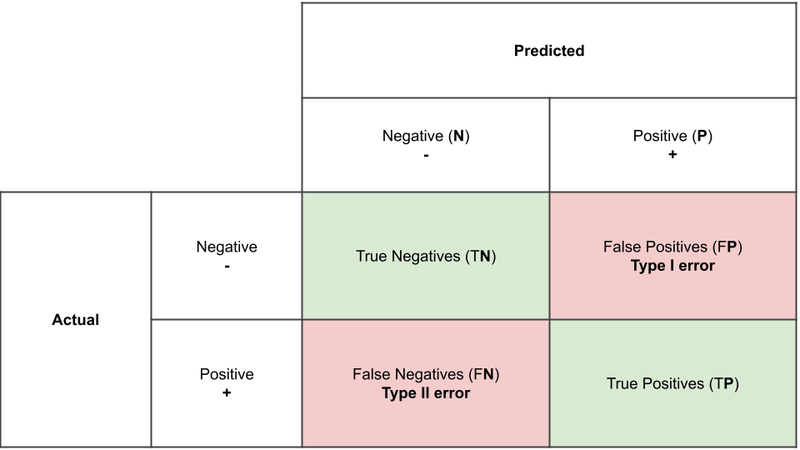

#### **참고한 레퍼런스**

분류성능평가지표 - Precision(정밀도), Recall(재현율) and Accuracy(정확도) https://sumniya.tistory.com/26
<br>머신러닝에서 사용되는 평가지표 https://gaussian37.github.io/ml-concept-ml-evaluation/
<br>[머신러닝] 모델링 과정 https://bigdaheta.tistory.com/54
<br>macro average and weighted average meaning in classification_report https://datascience.stackexchange.com/questions/65839/macro-average-and-weighted-average-meaning-in-classification-report